In [1]:
import numpy as np
import cv2



In [6]:
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot as plt

In [9]:
from scipy import ndimage

In [13]:
from skimage.color import rgb2gray

In [20]:
#read image
p1 = io.imread("portrait1.jpg")
p2 = io.imread("portrait2.jpg")
p3 = io.imread("portrait3.jpg")
p4 = io.imread("portrait4.jpg")

In [21]:
p1_gray =  rgb2gray(p1)
p2_gray =  rgb2gray(p2)
p3_gray =  rgb2gray(p3)
p4_gray =  rgb2gray(p4)

In [25]:
p1_resized = resize(p1_gray, (150, 150),
                       anti_aliasing=True)
p2_resized = resize(p2_gray, (150, 150),
                       anti_aliasing=True)
p3_resized = resize(p3_gray, (150, 150),
                       anti_aliasing=True)
p4_resized = resize(p4_gray, (150, 150),
                       anti_aliasing=True)

In [48]:
p1_resized_col = resize(p1, (150, 150),
                       anti_aliasing=True)
p2_resized_col = resize(p2, (150, 150),
                       anti_aliasing=True)
p3_resized_col = resize(p3, (150, 150),
                       anti_aliasing=True)
p4_resized_col = resize(p4, (150, 150),
                       anti_aliasing=True)

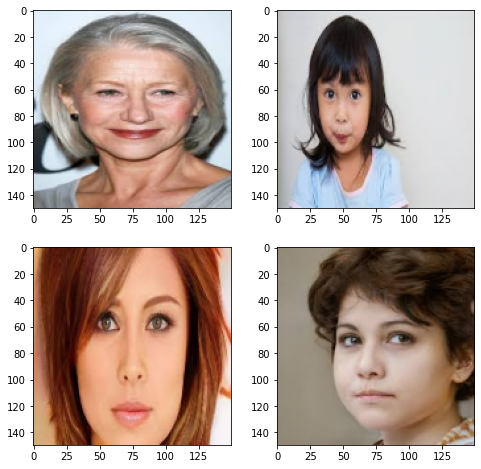

In [49]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))

axs[0, 0].imshow(p1_resized_col)
axs[0, 1].imshow(p2_resized_col)
axs[1, 0].imshow(p3_resized_col)
axs[1, 1].imshow(p4_resized_col)

In [26]:
#edge detection filter
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])

In [27]:
p1_convolve = ndimage.convolve(p1_resized, kernel, mode='constant', cval=0)
p2_convolve = ndimage.convolve(p2_resized, kernel, mode='constant', cval=0)
p3_convolve = ndimage.convolve(p3_resized, kernel, mode='constant', cval=0)
p4_convolve = ndimage.convolve(p4_resized, kernel, mode='constant', cval=0)

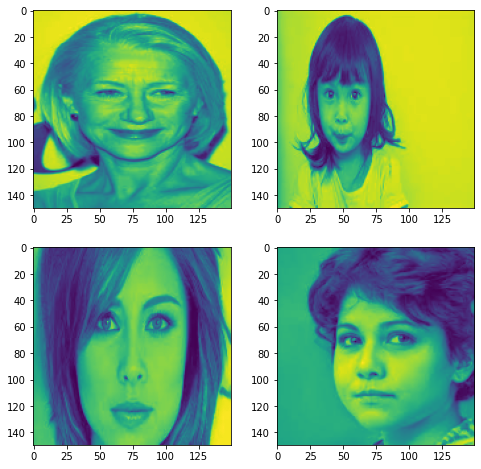

In [29]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))

axs[0, 0].imshow(p1_resized)
axs[0, 1].imshow(p2_resized)
axs[1, 0].imshow(p3_resized)
axs[1, 1].imshow(p4_resized)

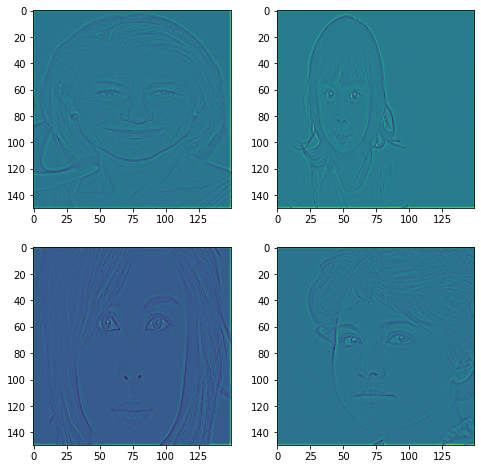

In [30]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
axs[0, 0].imshow(p1_convolve)
axs[0, 1].imshow(p2_convolve)
axs[1, 0].imshow(p3_convolve)
axs[1, 1].imshow(p4_convolve)

## 2nd convol on top of convolv image

In [33]:
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 5.0, -1.0],
                   [0.0, -1.0, 0.0]])

In [34]:
p1_convolve_2 = ndimage.convolve(p1_convolve, kernel, mode='constant', cval=0)
p2_convolve_2 = ndimage.convolve(p2_convolve, kernel, mode='constant', cval=0)
p3_convolve_2 = ndimage.convolve(p3_convolve, kernel, mode='constant', cval=0)
p4_convolve_2 = ndimage.convolve(p4_convolve, kernel, mode='constant', cval=0)

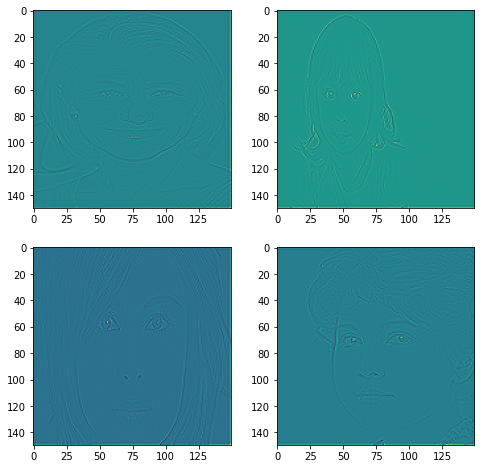

In [35]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
axs[0, 0].imshow(p1_convolve_2)
axs[0, 1].imshow(p2_convolve_2)
axs[1, 0].imshow(p3_convolve_2)
axs[1, 1].imshow(p4_convolve_2)

## Different Kernels

kernel
[[ 1.  0. -1.]
 [ 0.  0.  0.]
 [-1.  0.  1.]]
kernel
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]
kernel
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
kernel
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]
kernel
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]
kernel
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
flipped_kernel
[[ 1.  0. -1.]
 [ 0.  0.  0.]
 [-1.  0.  1.]]

flipped_kernel
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

flipped_kernel
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]

flipped_kernel
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]

flipped_kernel
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]

flipped_kernel
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]



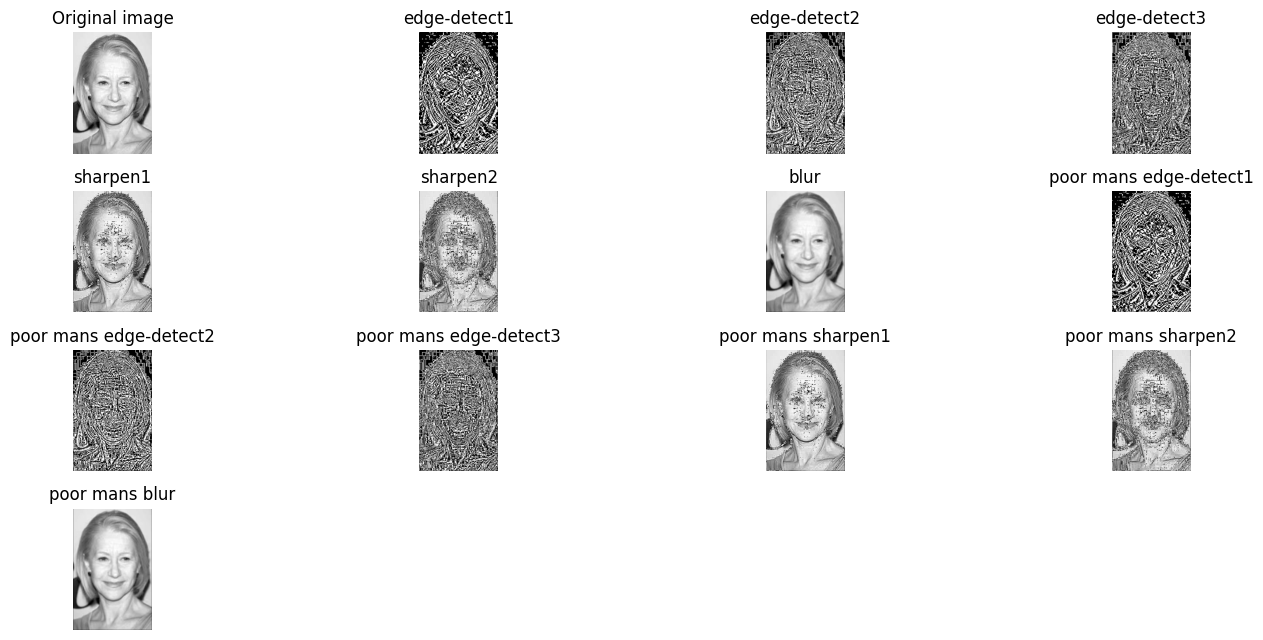

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage.filters as filter

def normalize(matrix):
    sum = np.sum(matrix)
    if sum > 0.:
        return matrix / sum
    else:
        return matrix

def neighbors(r,c,supermatrix): 
    m = supermatrix[r:r+3,c:c+3] 
    return m

def convolve(n,kernel):
    sum = 0
    for (rr,cc),value in np.ndenumerate(n):
        sum += n[rr,cc] * kernel[rr,cc]

    return sum % 255

def poor_mans_convolve(matrix,super,kernel,shape):
    result = np.ndarray(shape,dtype=np.float)

    for (r,c),value in np.ndenumerate(matrix):
        n = neighbors(r,c,super)
        result[r,c] = convolve(n,kernel)

    return result

fig = plt.figure(figsize=(14, 6.5), dpi=100)

kernel_edge_detect1 = np.array([[1.,0.,-1.],
                                [0.,0.,0.],
                                [-1.,0.,1.]])

kernel_edge_detect2 = np.array([[0.,1.,0.],
                                [1.,-4.,1.],
                                [0.,1.,0.]])

kernel_edge_detect3 = np.array([[-1.,-1.,-1.],
                                [-1.,8.,-1.],
                                [-1.,-1.,-1.]])

kernel_sharpen = np.array([[0.,-1.,0.],
                           [-1.,5.,-1.],
                           [0.,-1.,0.]])

kernel_sharpen2 = np.array([[-1.,-1.,-1.],
                           [-1.,9.,-1.],
                           [-1.,-1.,-1.]])

kernel_blur = np.array([[1.,1.,1.],
                        [1.,1.,1.],
                        [1.,1.,1.]])

kernel_list = [kernel_edge_detect1,kernel_edge_detect2,kernel_edge_detect3,kernel_sharpen,kernel_sharpen2,kernel_blur]
title_list = ['edge-detect1','edge-detect2','edge-detect3','sharpen1','sharpen2','blur']

image=mpimg.imread('portrait1.jpg')[:,:,0]
shape = image.shape
newimage = np.ndarray(shape,dtype=np.float)
poorimage = np.ndarray(shape,dtype=np.float)
supershape = (shape[0] + 2,shape[1] + 2) 
supermatrix = np.zeros(supershape,dtype=np.float)
supermatrix[1:-1,1:-1] = image

imagelist_std_convolve = []
imagelist_poor_convolve = []

fig.add_subplot(4,4,1)
plt.title('Original image')
plt.imshow(image,cmap=plt.cm.gray)
plt.axis('off')

for i in range(len(kernel_list)):
    kernel_list[i] = normalize(kernel_list[i])
    newimage = filter.convolve(image,kernel_list[i],mode='constant', cval=0)
    imagelist_std_convolve.append(newimage)
    print('kernel')
    print(kernel_list[i])

    print
    fig.add_subplot(4,4,i+2)
    plt.title(title_list[i])
    plt.imshow(newimage,cmap=plt.cm.gray)
    plt.axis('off')

for i in range(len(kernel_list)):
    flipped_kernel = kernel_list[i].copy()
    flipped_kernel = np.fliplr(flipped_kernel)
    flipped_kernel = np.flipud(flipped_kernel)
    flipped_kernel = normalize(flipped_kernel)
    poorimage=poor_mans_convolve(image,supermatrix,flipped_kernel,shape)
    imagelist_poor_convolve.append(poorimage)
    print('flipped_kernel')
    print(flipped_kernel)
    print()
    fig.add_subplot(4,4,i+2+6)
    plt.title('poor mans ' + title_list[i])
    plt.imshow(poorimage,cmap=plt.cm.gray)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Faces Hog Feature - Example 2

In [38]:
faces1 = io.imread("faces1.jpg")

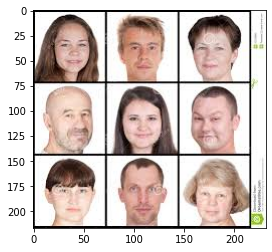

In [39]:
plt.imshow(faces1)

In [43]:
faces1_gray =  rgb2gray(faces1)

In [44]:
f1_convolve = ndimage.convolve(faces1_gray, kernel, mode='constant', cval=0)

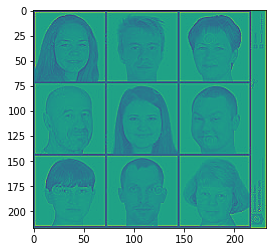

In [46]:
plt.imshow(f1_convolve)